# James' Notebook

In [2]:
# imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# import eli5

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

import requests
from bs4 import BeautifulSoup 
import re
from src import prepare, acquire



plt.style.use('classic')

ModuleNotFoundError: No module named 'utils'

# Acquire

In [ ]:
# acquire function to scrape github data
acquire.scrape_github_data()

https://github.com/search?q=candles&type=Repositories

In [10]:
# this was my attempt at getting readme data from github

# url = 'https://github.com/search?q=candles&type=Repositories'
# headers={'user-agent': 'Codeup DS Germain'} 
# response = requests.get(url, headers=headers)

# soup = BeautifulSoup(response.text)


# article = soup.select('div', class_='jupiterx-post-content')

# art_dict = {'title':[], 'content':[]}

# soup.title.string

# Explore

In [8]:
# getting the data 
df = pd.read_csv('data/processed.csv')

In [9]:
df.head() # check_yo_head

,repo,language,readme,words,lang_freq
0,/apple/swift,C++,img src https swift org asset imag swift svg a...,1260,100
1,/openalpr/openalpr,C++,openalpr openalpr open sourc automat licens pl...,622,100
2,/tensorflow/tensorflow,C++,div align center img src https www tensorflow ...,1216,100
3,/wjakob/pybind11,C++,pybind logo https github com pybind pybind raw...,610,100
4,/Polytonic/Chlorine,C++,chlorin http polyton github io chlorin build s...,624,100


In [63]:
# grouping the data by the language column values
df.groupby('language').sum()

,words,lang_freq
language,,
C,77923,8836
C++,88730,10000
Go,98088,11236
Java,51615,10404
JavaScript,124578,9409
Python,107661,10404
Swift,141670,10000


In [25]:
# getting the number count of each language in the data
df.language.value_counts()

Go            106
Java          102
Python        102
C++           100
Swift         100
JavaScript     97
C              94
Name: language, dtype: int64

In [30]:
# additional imports
import nltk
import unicodedata

In [37]:
# breaking up the data into the separate languages 
go = clean(' '.join(df[df.language == 'Go'].language))
java = clean(' '.join(df[df.language == 'Java'].language))
python = clean(' '.join(df[df.language == 'Python'].language))
C_plus_plus = clean(' '.join(df[df.language == 'C++'].language))
Swift = clean(' '.join(df[df.language == 'Swift'].language))
javascript = clean(' '.join(df[df.language == 'JavaScript'].language))
c = clean(' '.join(df[df.language == 'C'].language))
all_languages = clean(' '.join(df.language))

In [42]:
# transforming the data into a pandas series
go_freq = pd.Series(go).value_counts()
java_freq = pd.Series(java).value_counts()
python_freq = pd.Series(python).value_counts()
c_plus_plus_freq = pd.Series(C_plus_plus).value_counts()
Swift_freq = pd.Series(Swift).value_counts()
javascript_freq = pd.Series(javascript).value_counts()
c_script = pd.Series(c).value_counts()

all_freq = pd.Series(all_languages).value_counts()

java_freq.head()

java    102
dtype: int64

In [43]:
# combining the languages into one dataframe
word_counts = (pd.concat([all_freq, go_freq, java_freq, python_freq, c_plus_plus_freq, Swift_freq, javascript_freq, c_script], axis=1, sort=True)
                .set_axis(['all', 'go', 'java', 'python', 'c++', 'swift', 'js', 'c'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,go,java,python,c++,swift,js,c
c,194,0,0,0,100,0,0,94
go,106,106,0,0,0,0,0,0
java,102,0,102,0,0,0,0,0
javascript,97,0,0,0,0,0,97,0
python,102,0,0,102,0,0,0,0


In [44]:
# sorting the dataframe by most frequently occuring
# the c row counted both 'c' and 'c++' languages
word_counts.sort_values(by='all', ascending=False).head(10)

,all,go,java,python,c++,swift,js,c
c,194,0,0,0,100,0,0,94
go,106,106,0,0,0,0,0,0
java,102,0,102,0,0,0,0,0
python,102,0,0,102,0,0,0,0
swift,100,0,0,0,0,100,0,0
javascript,97,0,0,0,0,0,97,0


# Visualization

Text(0.5, 1.0, 'Proportion of Coding Languages')

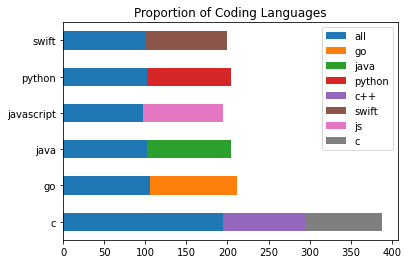

In [49]:
# barh plot of the proportion of coding languages
word_counts.plot.barh(stacked=True)
plt.title('Proportion of Coding Languages')

In [50]:
# imports for wordclouds
from wordcloud import WordCloud

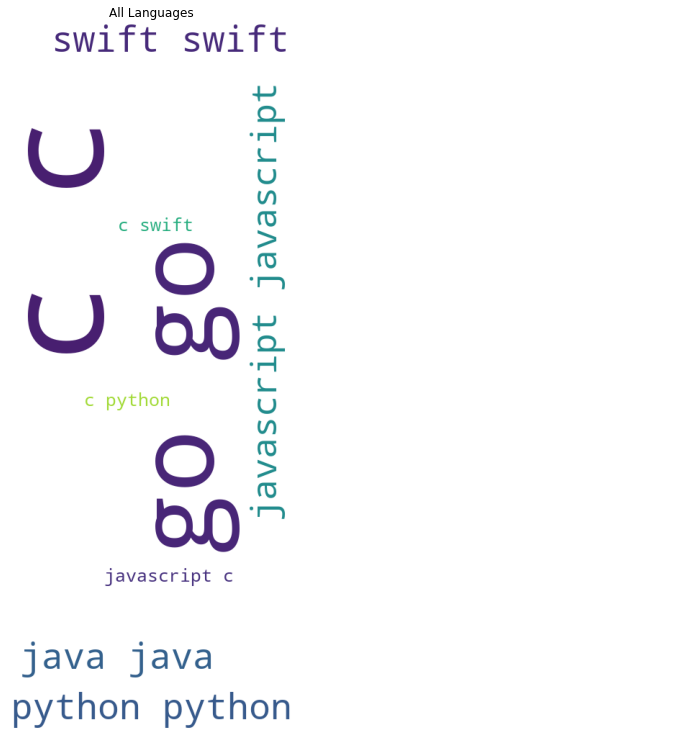

In [60]:
# creating a word cloud for all the languages
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_languages))

plt.figure(figsize=(10, 10))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)

axs[0].set_title('All Languages')

for ax in axs: ax.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

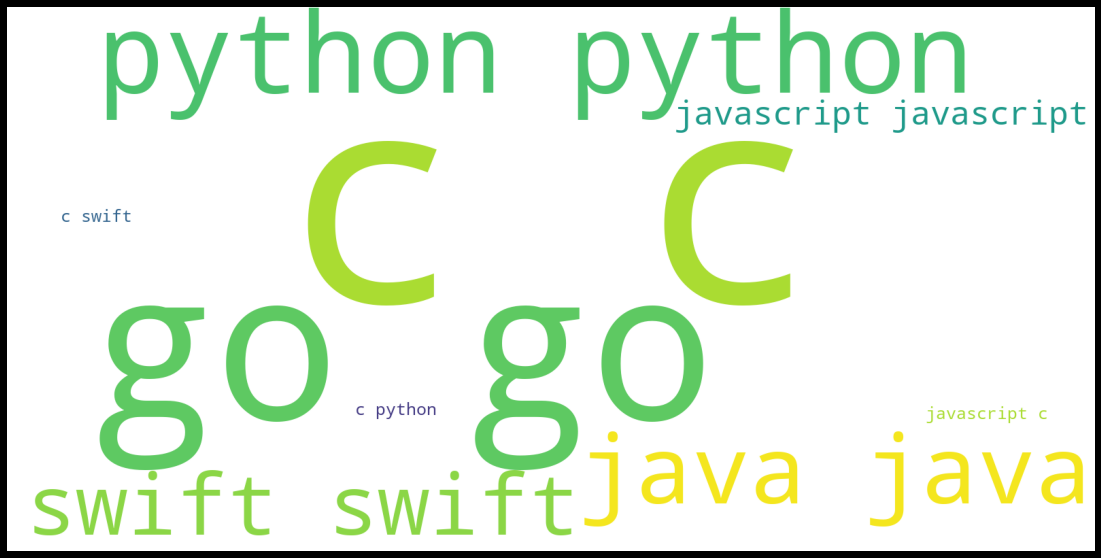

In [61]:
# another wordcloud of all the languages
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(all_languages))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

<AxesSubplot:ylabel='language'>

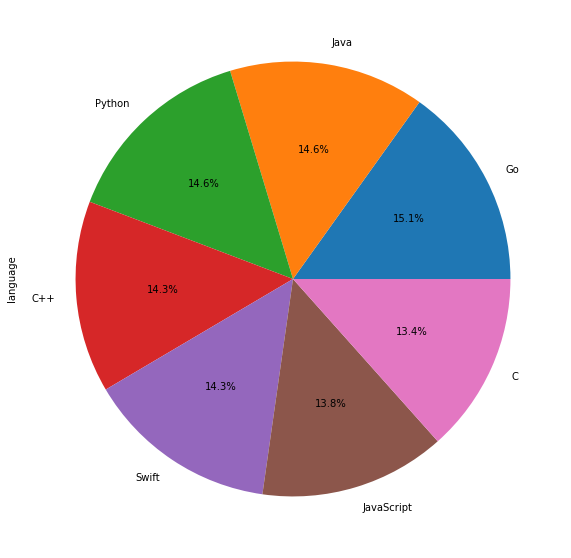

In [84]:
# making a pie chart of all the languages
plt.figure(figsize=(20,10))
df['language'].value_counts().head(10).plot.pie(autopct='%1.1f%%')

Text(0.5, 1.0, 'Scatterplot of Languages and Word Counts')

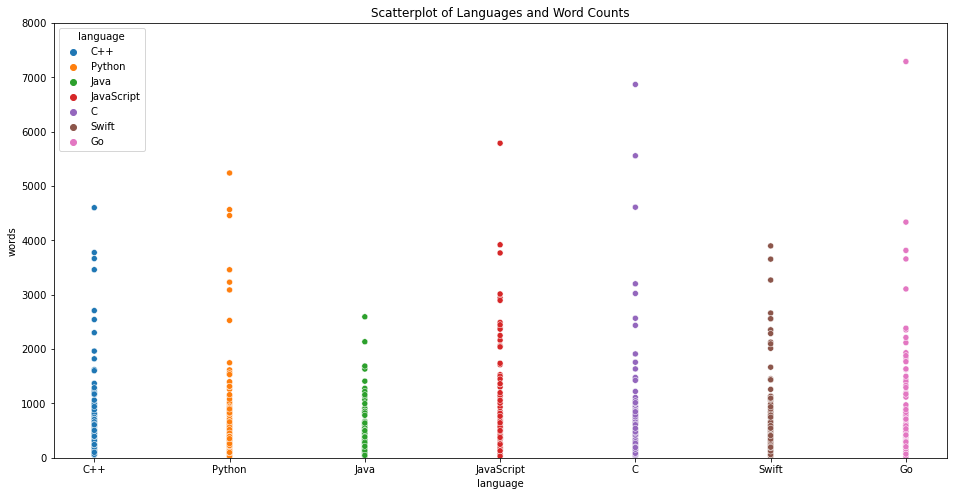

In [94]:
# scatterplot of all the languages
plt.figure(figsize=(16,8))
sns.scatterplot(x='language',y='words',data=df, hue='language')
## Set axis limits
plt.ylim(0,8000)

plt.title('Scatterplot of Languages and Word Counts')